# Practical 2: Quantitative Optical Remote Sensing

In this practical, we will build on the theoretical and Python concepts seen so far to load, plot, and perform quantitative analysis on data from [Landsat 8](https://en.wikipedia.org/wiki/Landsat_8).

## General instructions

Type out your answer to questions in the provided *Markdown* cell (delete the placeholder text). 
You can use the code cells provided to do the calculations.

Remember: 
* Double click on a Markdown cell to edit its contents.
* You can write equations in Markdown by surrounding them in `$`. The syntax for the equations is from a program called [LaTeX](https://en.wikipedia.org/wiki/LaTeX). You can learn about the syntax for writing equations with [this guide](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* To get a cheat sheet of Markdown formatting, click on the menu: Help > Markdown Reference.
* Use descriptive variable names.
* Use the `print` function to display the contents of a variable.
* **Be mindful of units!**

Example equation: $\lambda = \dfrac{c}{\nu} = 10\ \mu m$

## Exercise 1

[![Landsat 8 and 7 bands](https://wiki.landscapetoolbox.org/lib/exe/fetch.php/remote_sensor_types:landsat8_bands.jpg)](https://wiki.landscapetoolbox.org/doku.php/remote_sensor_types:landsat_8)

Analysing the figure above:

1. Why do the sensors in Landsat-7 (ETM+) and Landsat-8 (OLI) avoid the blue spectrum for their panchromatic band?
2. What colour would vegetation appear in a RGB composite of bands 5-4-3 from a Landsat-8 image?

---

*Type your answers here.*

## Exercise 2

The figure below shows thermal emissivity for various rock types. 
The numbers at the top mark the different [ASTER](https://en.wikipedia.org/wiki/Advanced_Spaceborne_Thermal_Emission_and_Reflection_Radiometer) thermal infrared bands.


![Emissivity profiles for different rock types](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.springernature.com%2Flw785%2Fspringer-static%2Fimage%2Fart%253A10.1007%252Fs13146-011-0071-4%2FMediaObjects%2F13146_2011_71_Fig2_HTML.gif&f=1&nofb=1)

1. Explain why the *carbonate index* (CI) is defined as $\dfrac{band_{13}}{band_{14}}$.
2. What would be a suitable *mafic index* (MI)? Explain your answer.

---

*Type your answers here.*

## Exercise 3

In this exercise, we will work with a subset of a Landsat-8 scene of the [Kīlauea Volcano](https://en.wikipedia.org/wiki/K%C4%ABlauea) on [Hawai'i Island](https://en.wikipedia.org/wiki/Hawaii_(island)) taken on 2018/12/26. This part of the island is known as the Lower East Rift Zone (LERZ) and was the site of the [2018 lower Puna eruptions](https://en.wikipedia.org/wiki/2018_lower_Puna_eruption) (which you might have seen in the news). 

The code below inserts Google Maps in the notebook, which is useful to get a sense for the location. 

In [2]:
#    Esta es la libreria de python para manejar mapas de ubicaciones geograficas copiadas de google maps
#     hace muchas cosas pero la funcion IFrame hace un marco y muestra una ubicacion copiada de googlemaps

from IPython.display import IFrame

#IFrame(
#    src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d202554.14812323148!2d-155.20944817855005!3d19.380763049328742!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x7953da0aba317e0d%3A0x205a2df987301b9b!2zS8SrbGF1ZWE!5e0!3m2!1sen!2suk!4v1580887731814!5m2!1sen!2suk",
#    width="600", height="450", frameborder="0", style="border:0;",
#)

# le coloque las lineas en comentarios al ejemplo y utilice la misma instaruccion para mostrar la 
# ubicacion de nuestra casa aqui en Portugal
# lo que hice fue colocarme en google maps y decirle compartir ubicacion y seleccione la opcion que dice
# compartir como HTML, eso que me copio ahi lo pegue dentro de la instruccion IFrame y listo
from IPython.display import IFrame

IFrame(
    src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d202554.14812323148!2d-155.20944817855005!3d19.380763049328742!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x7953da0aba317e0d%3A0x205a2df987301b9b!2zS8SrbGF1ZWE!5e0!3m2!1sen!2suk!4v1580887731814!5m2!1sen!2suk",
    width="600", height="450", frameborder="0", style="border:0;",
)

The table below shows each Landsat-8 band with their respective names, wavelengths, and resolutions.

<img width="50%" src="https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/Landsat%208%20band%20designations.jpg">

To save time in the practical, the scene was croped to the area of interest and only bands 1-7 are included (all with 30m resolution). 
The different bands have been stacked and saved in a 3D numpy array with dimensions \[height, width, band\].
The array was saved in the file  `kilauea-landsat8.npy`.
This is not an image file format, it's a binary format used for storing [Numpy](https://numpy.org/) arrays
(only used here to make it easier to load without [specialized libraries](https://rasterio.readthedocs.io)). 
The arrays are enconded in [unsigned 16-bit integers](https://docs.scipy.org/doc/numpy/user/basics.types.html) (`uint16`).

The code below imports the required libraries and loads the stack of scenes from the file.

In [17]:
# Aqui se realiza la importacion de las librerias a utilizar para este procesamiento de imagenes
# numpy es la libreria mas utilizada para trabajar con arreglos y vectores asi como con funciones matematicas
# maplotlib utiliza las funciones basicas de ploteo de datos
# y skimage.exposure estan escogiendo la sublibreria exposure de la libreria cientifica skimage para hacer
# composicion de colores en un arreglo, generalmente usada para componer RGB

import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt
import time

In [2]:

# Aqui estan utilizando la libreria numpy utilizando el procedimiento load "np.load"
# para cargar en un arreglo llamado scene los datos que estan en el archivo "kilauea-landsat8.npy"
# tal como dice arriba only bands 1-7 are included solo 7 bandas estan en este archivo. 

scene = np.load("kilauea-landsat8.npy")
print(scene)

[[[8605 8012 7365 ... 7620 7382 6961]
  [8658 8037 7457 ... 7843 7811 7276]
  [8667 8071 7475 ... 7899 7785 7263]
  ...
  [9457 8363 6792 ... 5595 5309 5235]
  [9521 8428 6794 ... 5605 5303 5236]
  [9573 8501 6835 ... 5644 5328 5265]]

 [[8627 8005 7403 ... 7702 7514 7059]
  [8676 8100 7558 ... 8093 8084 7537]
  [8669 8082 7524 ... 8062 8046 7453]
  ...
  [9440 8327 6751 ... 5546 5255 5186]
  [9512 8394 6785 ... 5568 5303 5226]
  [9584 8506 6848 ... 5642 5335 5268]]

 [[8706 8127 7610 ... 8173 7968 7484]
  [8719 8163 7640 ... 8256 8353 7810]
  [8633 8040 7428 ... 7937 7940 7371]
  ...
  [9346 8273 6728 ... 5547 5246 5183]
  [9475 8412 6787 ... 5578 5288 5226]
  [9582 8486 6836 ... 5665 5340 5268]]

 ...

 [[9972 9258 8568 ... 8928 8336 7674]
  [9933 9234 8608 ... 9102 8800 7850]
  [9920 9251 8577 ... 9088 8459 7699]
  ...
  [9772 8606 6903 ... 5705 5394 5315]
  [9726 8573 6872 ... 5677 5394 5302]
  [9754 8599 6912 ... 5704 5383 5297]]

 [[9920 9259 8561 ... 9108 8636 7857]
  [9919 9235

The `shape` of a numpy array is the number of elements per dimensions of the array:

In [3]:
# El archivo leido y cargado en el array scene contiene 7 hojas de datos cada una de 1100 filas por 2100 columnas
# bueno digo hojas solo para entendimiento pero en realidad es una dimension mas del array scene(x, y , z)
# x = 1100, y = 2100, z=7  donde z serian cada una de las bandas 
# en esta instruccion como scene es un arreglo, con la funcion shape se puede ver las dimensiones del array

print(scene.shape)

(1100, 2100, 7)


In [5]:
# Aqui utilizan shape para tomar los 3 valores que arroja y guardarlos en las variables ancho, altura y numero de banda
# en el ejercicio final en lugar de calcular el numero de filas y columnas utilizamos esta mismas variables

print(scene.shape[0]) # 0 is the element 0 in the brackets, that will give me the first element of the list, also if i dont know how many elements do i have i can use -1 and that will give me the last element 
height=scene.shape[0]
width=scene.shape[1]
nbands=scene.shape[2]

1100


The first two dimensions are the height and the width of the scene. The third is the band. Bands 1-7 are stored in order.

Python supports *unpacking* a collection into different variables like this:

In [4]:
height, width, nbands = scene.shape
print(height,width,nbands)

1100 2100 7


You can access parts of a numpy array the way we accessed elements or slices of lists:

In [5]:
# aqui esta bien explicado como tomar un pixel que es un elemento del array scene, o tomar toda una columna etc

# The value of the first pixel on the second band
print(scene[0, 0, 1])
# The first line of the third band
print(scene[0, :, 2]) # the colon is an interval here
# The entire fith band
print(scene[:, :, 4]) #this will give me all rows and all collumns of band 5 (0,1,2,3,4. 4 is band 5)

8012
[7365 7457 7475 ... 6792 6794 6835]
[[7620 7843 7899 ... 5595 5605 5644]
 [7702 8093 8062 ... 5546 5568 5642]
 [8173 8256 7937 ... 5547 5578 5665]
 ...
 [8928 9102 9088 ... 5705 5677 5704]
 [9108 9249 9259 ... 5764 5711 5833]
 [9235 9094 9434 ... 5729 5727 5791]]


Use the cell below to plot the Near Infrared (NIR) band in grey scale:

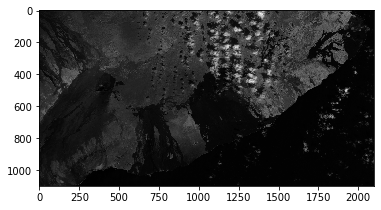

In [6]:
# aqui en el arreglo nir_band de solo 2 dimensiones ancho por alto, estamos guardando toda la banda 5
# filtramos por el numero 4 pero como el erreglo comienza en 0 entonces en 4 posicion esta la 5 banda (NIR)

nir_band=scene [:,:,4]

plt.figure()
plt.imshow(nir_band, cmap="gray")

# puedes plotear sin colores y ver el color original quitando cmap="gray"
# plt.imshow(nir_band)

plt.show()


To the image in "true color", we have to make a composite of the reg, green, and blue bands:

In [7]:
# para componer RGB necesitamos un arreglo de 3 dimensiones para tener el Red en una hoja, el Green y Blue
# en otras consecutivas, por eso crean un arreglo vacio de 1100 * 2100 * 3


# Create an empty array of the right size with 3 bands (RGB) using the same data type as the scene
composite = np.empty((height, width, 3), dtype="uint16")

# Assign the red, green, and blue bands to the first, second, and third composite bands, respectively
# puedes ver aqui lo facil que es copiar de scene al arreglo composite utilizando ":" , por eso se usa
# python para matematicas en otro lenguaje habria que hacer ciclos for y comparaciones etc...

composite[:,:,0] = scene[:,:,3]   # cuarta banda completa  (red)
composite[:,:,1] = scene[:,:,2]   # tercera banda completa  (green)
composite[:,:,2] = scene[:,:,1]   # segunda banda completa  (blue)
# Scene values are not in the 0-255 range (8-bit integer) and imshow can't display them properly like that.
# Use scikit-image to rescale the values from 16bit to 8bit.
composite = skimage.exposure.rescale_intensity(composite, out_range="uint8")
print(composite.shape)

(1100, 2100, 3)


Use the cell below to plot the true color composite using `imshow`:

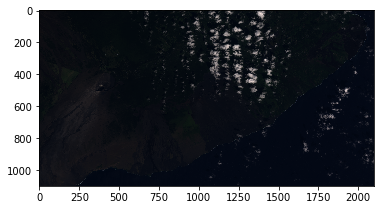

In [8]:
# de nuevo aqui se utiiza el comando plt para mostrar el arreglo composite con las 3 bandas mezcladas

plt.figure()
plt.imshow(composite)
plt.show()

Apply contrast streching (see practical 1) to the composite to increase the visibility of the image:

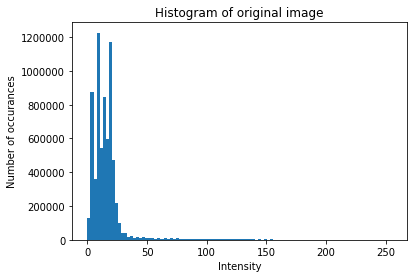

In [9]:
plt.figure()
plt.title("Histogram of original image")
plt.hist(composite.ravel(), bins=100)
plt.xlabel("Intensity")
plt.ylabel("Number of occurances")
plt.show()

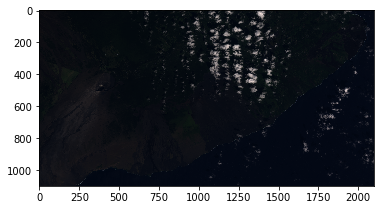

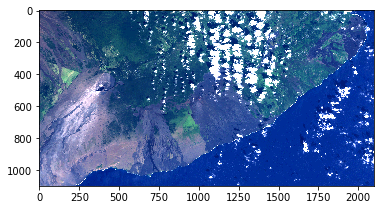

In [12]:
# despues de ver el histograma y la distribucion de datos se puede reescalar el arreglo en el percentil
# adecuado (5 , 95) para volver a plotear y mejorar la visualizacion

low_end, high_end = np.percentile(composite, (5, 95))
composite_rescale = skimage.exposure.rescale_intensity(composite , in_range=(low_end, high_end),out_range="uint8") # be careful that this is uint NOT unit

plt.figure()
plt.imshow(composite)
plt.figure()
plt.imshow(composite_rescale)
plt.show()

Create and plot a composite of bands 5 (as R), 4 (as G), and 3 (as B). 
You might need to enhance the image.

In [10]:
# igual que el ejercicio anterior... repeticion pero con otras bandas...

# Create an empty array of the right size with 3 bands (RGB) using the same data type as the scene
composite = np.empty((height, width, 3), dtype="uint16")
# Assign the red, green, and blue bands to the first, second, and third composite bands, respectively
composite[:,:,0] = scene[:,:,5]
composite[:,:,1] = scene[:,:,4]
composite[:,:,2] = scene[:,:,3]
# Scene values are not in the 0-255 range (8-bit integer) and imshow can't display them properly like that.
# Use scikit-image to rescale the values from 16bit to 8bit.
composite = skimage.exposure.rescale_intensity(composite, out_range="uint8")
print(composite.shape)

(1100, 2100, 3)


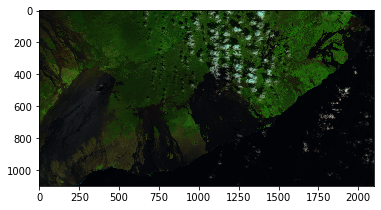

In [12]:
plt.figure()
plt.imshow(composite)
plt.show()

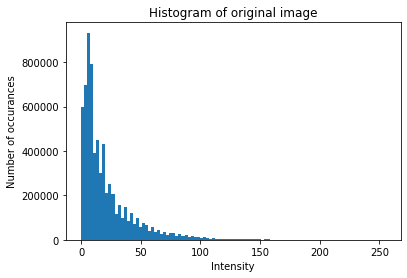

In [13]:
plt.figure()
plt.title("Histogram of original image")
plt.hist(composite.ravel(), bins=100)
plt.xlabel("Intensity")
plt.ylabel("Number of occurances")
plt.show()

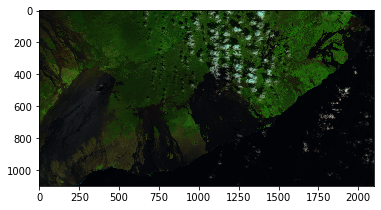

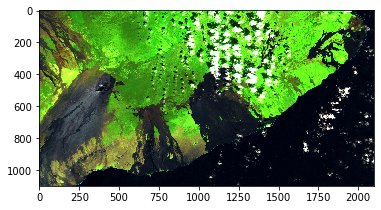

In [16]:
low_end, high_end = np.percentile(composite, (5, 95))
composite_rescale = skimage.exposure.rescale_intensity(composite , in_range=(low_end, high_end),out_range="uint8") # be careful that this is uint NOT unit

plt.figure()
plt.imshow(composite)
plt.figure()
plt.imshow(composite_rescale)
plt.show()

What is the standard name of this composite? 
Why are these particular bands used and what does the composite highlight?

In [17]:
#composite above highlights the areas affected by the lava flow

The [Normalized Difference Vegetation Index (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is motivated by the observation that
the difference between the NIR and red bands should be larger for greater chlorophyll density.
The index can be used to quantitavely distinguish between areas with vegetation and areas without.

$NVDI = \dfrac{NIR - red}{NIR + red}$

Calculate and plot a map of the NVDI in gray scale.

**Hint:** Before computing NDVI, we must convert the images from integer numbers to floating-point numbers (the index is a ratio and can't be represented by integer numbers only). To do that to any numpy array, use `new_array = old_array.astype("float32")`.


In [14]:
# en este ejercicio se crean los arreglos nir y red con la banda 5 y banda 4 para crear el arreglo nvdi
# se crean tipo float32 para que tengan bastantes decimales y mejorar la resolucion de los calculos
# ndvi es entonces un arreglo de 1100 * 2100  (solo 2 dimensiones)


nir=scene[:,:,4].astype("float32")
red=scene[:,:,3].astype("float32")
ndvi=(nir-red)/(nir+red)
print(ndvi)

[[ 0.01464714  0.02402402  0.02464652 ... -0.04285348 -0.04278029
  -0.04160299]
 [ 0.01797515  0.02716081  0.02949815 ... -0.04172786 -0.04255868
  -0.04153572]
 [ 0.02592104  0.02782446  0.03004348 ... -0.04345577 -0.0425678
  -0.03926058]
 ...
 [ 0.0184224   0.02511544  0.02428853 ... -0.04214238 -0.0416948
  -0.04231028]
 [ 0.02660054  0.03392767  0.03360125 ... -0.03756887 -0.04049059
  -0.04030931]
 [ 0.0385156   0.02467606  0.04346864 ... -0.04205334 -0.04134583
  -0.03811976]]


What do you think the areas with low NVDI represent?

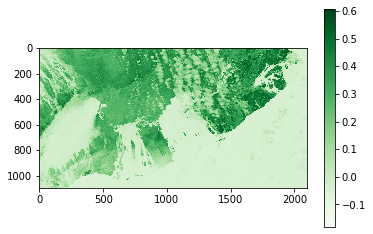

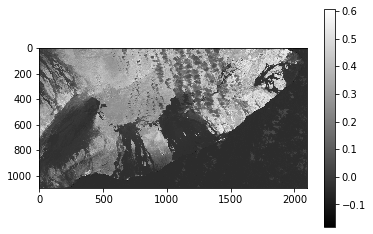

In [15]:
plt.figure()
plt.imshow(ndvi,cmap="Greens")
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(ndvi,cmap="gray")
plt.colorbar()
plt.show()

# Challeng of the week

Compute the area on this satellite image that might correspond with vegetation. 
Present your results as a percentage of the image. 
To do that, set a threshold for the NDVI (e.g., 0.3) and count the number of pixels that are greater than the threshold.

**Hint:** You can do this using 2 `for` loops and 1 `if` statement. The loops will implement an aggregator pattern.

**Hint 2:** The `range` function generates integer numbers from zero to the specified number (not included). For example, `range(3)` generates the numbers 0, 1, 2. Use it in your `for` loops.

**Bonus:** You can do the same calculation using zero loops and `if` statements, in a single line of code. To do this, you must take full advantage of numpy's capabilities. Try to solve the problem this way as well. 

In [22]:
# como dice el ejercicio se tiene que calcular del total de puntos cuantos son mayores que "threshold"
# a ese total de puntos se le saca el porcentaje del total de puntos y seria en porcentaje el area requerida

# esta primera forma iniciamos una variable cnt en 0 y recorremos con un for todas las filas y con otro todas las columnas es decir la primero vez compara ndvi[0,0] que es 0.01464714 como puedes ver arriba
# cuando se imprime ndvi como no es mayot que 0,3 cnt sigue en 0.  
#la segunda vez ndvi[0,1] 0.02402402 tampoco es mayor que 0,3 pero asi sigue por todo el array

cnt = 0
threshold = 0.3
seconds = time.time()
for i in range(0, height):
    for j in range(0, width):
        if ndvi[i,j] > threshold: cnt = cnt+1
print(cnt/(height*width)*100, " % ")
seconds = time.time()-seconds
print(seconds, "seconds")

24.31974025974026  % 
5.951935052871704 seconds


In [23]:
# aqui con la instruccion where de numpy se obtiene inmediatamente el resultado sin utilizar ciclos for
seconds = time.time()
temp=np.where(ndvi > threshold)
print(len(temp[1])/(height*width)*100, " % ")
seconds = time.time()-seconds
print(seconds, "seconds")
# para saber cuantos pixeles pasaron al array temp y cumplieron >0,3 se usa la instruccion len (longuitud) 
# o se puede usar la instruccion intrinsica de los arreglos "array.size" (tamaño del arreglo)
#print(temp[1].size, len(temp[1]))

24.31896103896104  % 
0.038249969482421875 seconds


### What are the possible sources of error in this estimate?
La fuente del error es el tipo de datos utilizados, como se observa la diferencia de observaciones que cumplen la condicion > threshold es de 18, es decir con los ciclos for contabilizamos 18 datos mas porque estamos comparando contra numero de formato flotante, mientras que con la instruccion implicita de python se esta realizando la comparacion de los datos en su formato original de almacenamiento que es numpy.uint16 . Es decir al realizar la conversion de datos estamos perdiendo resolucion que puede afectar las decimas en los mismos.